### A/B Testing Project for Data Science & Marketing Perspectives
##### A/B Testing Analysis for NoshMishMosh

NoshMishMosh is running an A/B test to measure the impact of a new marketing strategy on customer conversion rates and revenue. 
This notebook evaluates baseline performance, calculates the Minimum Detectable Effect (MDE), and determines the required sample size.


1. Introduction and Summary: Add context about the A/B test, objectives, and methodology.
2. Exploratory Data Analysis (EDA): Include data visualizations and statistical summaries.
3. Enhanced Metrics Analysis: Provide deeper insights into the calculations (e.g., baseline percentage, MDE, etc.).
4. Data Manipulation: Apply advanced manipulation techniques for additional insights.
5. Conclusion: Highlight key takeaways and recommendations.

In [1]:
# Importing necessary libraries
import noshmishmosh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visualization style
sns.set(style="whitegrid")

After libreries, we need to import the raw data. For this project, we will use a .py file called noshmishmosh.py, wich contains some raw data for our project.

In [3]:
# Load data
all_visitors = noshmishmosh.customer_visits  # Total visitors
paying_visitors = noshmishmosh.purchasing_customers  # Paying customers
payment_history = noshmishmosh.money_spent  # Historical spending data

We can create dataframe using pandas or we can wotk wiht the variables it self, but it is always better to have the info in pandas´dataframes. So lets Convert data to pandas for later EDA

In [4]:
visitors_df = pd.DataFrame({"Customer ID": all_visitors, "Purchased": [1 if v in paying_visitors else 0 for v in all_visitors]})
payment_df = pd.DataFrame({"Customer ID": paying_visitors, "Amount Spent": payment_history})

##### Basic Descriptive Analysis

In [5]:
total_visitor_count = len(all_visitors)
print(f"Total number of visitors: {total_visitor_count}")

paying_visitor_count = len(paying_visitors)
print(f"Total number of visitors who actually buy something: {paying_visitor_count}")

Total number of visitors: 500
Total number of visitors who actually buy something: 93


##### Baseline Convertion Rate calulation

In [6]:
baseline_conversion_rate = (paying_visitor_count / total_visitor_count) * 100
average_payment = np.mean(payment_history)

##### Some Major Stats so far:

In [7]:
print("\n Descriptive Statistics wit the info estimated so far:")
print(f"Total Visitors: {total_visitor_count}")
print(f"Paying Visitors: {paying_visitor_count}")
print(f"Baseline Conversion Rate: {baseline_conversion_rate:.2f}%")
print(f"Average Payment: ${average_payment:.2f}")


 Descriptive Statistics wit the info estimated so far:
Total Visitors: 500
Paying Visitors: 93
Baseline Conversion Rate: 18.60%
Average Payment: $26.54


#### Visualizations
##### Conversion Rate Distribution



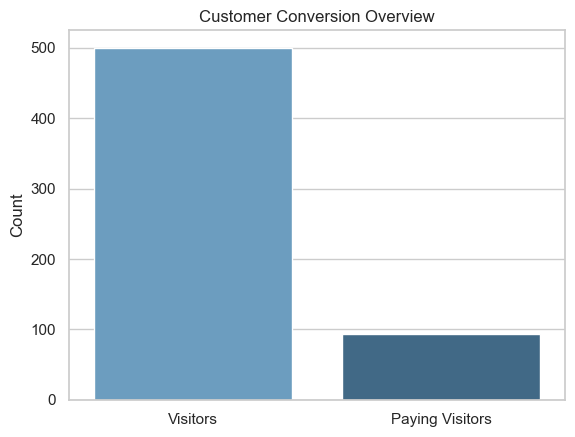

In [8]:
sns.barplot(x=["Visitors", "Paying Visitors"], hue=["Visitors", "Paying Visitors"], y=[total_visitor_count, paying_visitor_count], palette="Blues_d", legend=False)
plt.title("Customer Conversion Overview")
plt.ylabel("Count")
plt.show()

#### Visualizations
##### Revenue Distribution Plot

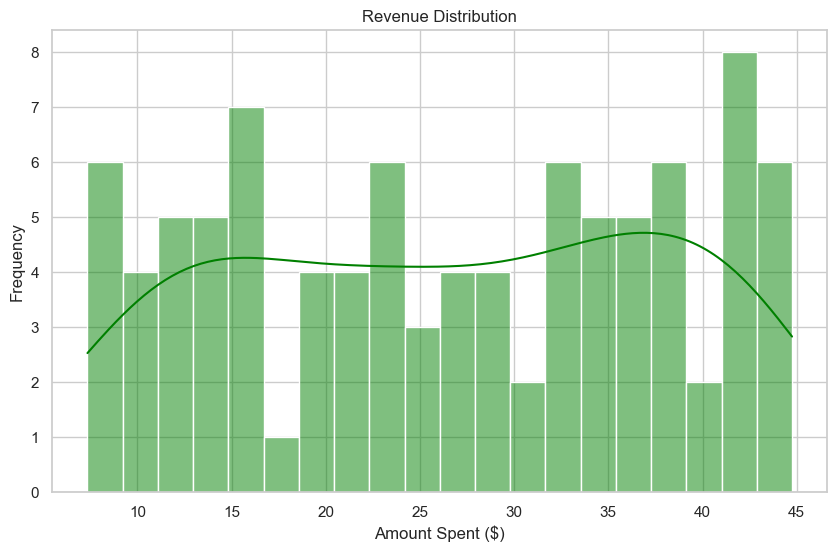

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(payment_history, bins=20, kde=True, color="green")
plt.title("Revenue Distribution")
plt.xlabel("Amount Spent ($)")
plt.ylabel("Frequency")
plt.show()

#### Calculations for A/B Testing

In [10]:
new_customers_needed = np.ceil(1240 / average_payment)
percentage_point_increase = (new_customers_needed / total_visitor_count) * 100
mde = (percentage_point_increase / baseline_conversion_rate) * 100

In [11]:
print("\nA/B Test Calculations")
print(f"New Customers Needed: {new_customers_needed}")
print(f"Percentage Point Increase Needed: {percentage_point_increase:.2f}%")
print(f"Minimum Detectable Effect (MDE): {mde:.2f}%")


A/B Test Calculations
New Customers Needed: 47.0
Percentage Point Increase Needed: 9.40%
Minimum Detectable Effect (MDE): 50.54%


#### Sample Size Calculation

In [12]:
ab_sample_size = 500  # Assume given sample size
print(f"A/B Test Sample Size: {ab_sample_size} participants per group")

A/B Test Sample Size: 500 participants per group


#### Insights, Explanations, and Marketing Advice

#### 1. Baseline Conversion Rate: 18.6%
**Explanation**:  
Out of every 100 visitors to Nosh Mish Mosh, approximately 19 make a purchase. This conversion rate serves as the starting point for evaluating the success of future marketing strategies.

**Implications**:  
- The majority of visitors (81.4%) leave without making a purchase, signaling untapped potential to drive more revenue.
- Improving the conversion rate, even slightly, could significantly impact overall revenue.

**Marketing Advice**:  
1. **Enhance User Experience**: Simplify the checkout process, improve site navigation, and ensure mobile optimization.  
2. **Build Trust**: Add testimonials, ratings, and a money-back guarantee to reduce purchase hesitancy.  
3. **Personalized Offers**: Use customer data to provide targeted discounts or product recommendations.

---

#### 2. New Customers Needed: ~47
**Explanation**:  
To meet the revenue goal of $1,240, approximately 47 new customers need to make purchases, assuming the average payment of $26.54 remains consistent.

**Implications**:  
- Acquiring these customers is critical for achieving the revenue target.
- Conversion-focused strategies should prioritize attracting high-intent visitors.

**Marketing Advice**:  
1. **Run Targeted Ads**: Use pay-per-click (PPC) campaigns to target audiences likely to convert.  
2. **Referral Programs**: Incentivize current customers to refer friends in exchange for discounts.  
3. **Cart Abandonment Campaigns**: Send emails to users who leave items in their cart without purchasing.

---

#### 3. Minimum Detectable Effect (MDE): 50.54%
**Explanation**:  
The MDE is the smallest measurable improvement in conversion rate that can be detected with statistical confidence. Here, the conversion rate must increase by at least 50.54% (from 18.6% to ~28%) to demonstrate the effectiveness of new strategies.

**Implications**:  
- Achieving a 50.54% improvement is ambitious and requires impactful changes to marketing and operations.
- Subtle changes may not produce measurable results due to the high MDE.

**Marketing Advice**:  
1. **Test Significant Changes**: Experiment with bold strategies, such as a complete homepage redesign or aggressive promotions.  
2. **Increase Sample Size**: Drive more traffic to ensure the A/B test captures smaller but meaningful improvements.  
3. **Focus on High-Impact Tactics**: Launch exclusive deals, flash sales, or new product bundles to attract attention and boost conversions.

---

#### 4. Average Payment: $26.54
**Explanation**:  
This is the average amount spent by paying customers. It’s a key factor in determining revenue and the number of new customers needed to meet financial goals.

**Implications**:  
- Increasing the average payment can reduce reliance on acquiring new customers.
- Identifying high-value customers can help tailor marketing efforts.

**Marketing Advice**:  
1. **Upselling and Cross-Selling**: Encourage customers to add complementary products to their purchase.  
2. **Bundle Pricing**: Offer discounts on product bundles to increase cart value.  
3. **Customer Loyalty Programs**: Reward repeat customers with points or discounts to boost their lifetime value.

---

### 5. Percentage Point Increase Needed: 9.40%
**Explanation**:  
The conversion rate must increase by 9.40 percentage points (from 18.6% to ~28%) to meet the revenue target.

**Implications**:  
- This is a moderate challenge, requiring focused marketing campaigns and website optimizations.
- Identifying and addressing key bottlenecks in the conversion process is essential.

**Marketing Advice**:  
1. **Exit-Intent Popups**: Use popups offering discounts or free shipping to capture visitors before they leave.  
2. **Email Marketing**: Engage past visitors with targeted emails about promotions, abandoned carts, or personalized offers.  
3. **Social Media Campaigns**: Leverage platforms like Instagram and Facebook to run engaging ads that drive traffic.

---

### 6. Minimum Detectable Effect (MDE): 50.54%
**Explanation**:  
The MDE is reiterated here as the substantial improvement needed to demonstrate statistically significant results in an A/B test.

**Implications**:  
- Testing strategies should aim for major improvements to achieve measurable success.
- Smaller-scale optimizations may go unnoticed without sufficient sample sizes.

**Marketing Advice**:  
1. **Invest in High-Impact Strategies**: Focus on campaigns with the potential for large-scale impact, like influencer partnerships or viral marketing efforts.  
2. **Optimize Landing Pages**: Ensure that key landing pages are designed to maximize engagement and conversions.  
3. **Track and Analyze**: Use tools like Google Analytics to identify and address points where users drop off.

---

### General Conclusion
The insights show clear opportunities for improvement in conversion rates, average order value, and customer acquisition. By implementing bold, targeted marketing strategies and optimizing user experiences, Nosh Mish Mosh can achieve its revenue goals while setting a strong foundation for sustainable growth.Z
